# Comparison within different Machine Learning techniques: Logistic Regression, Neural Network, Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df_big = pd.read_table("pop_failures.dat", sep="\s+")
data = df_big.drop(columns=['Study', 'Run', 'outcome'])
features = data.columns
target = df_big['outcome']

# Split into train (Study 1-2) and test (Study 3)
X_train = data[df_big['Study'].isin([1,2])].values
X_test = data[df_big['Study'] == 3].values
y_train = target[df_big['Study'].isin([1,2])].values
y_test = target[df_big['Study'] == 3].values

In [2]:
def plot_confusionmatrix(y_test, y_pred, accuracy, title, filename, size=15, plot = True):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sn.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'plasma', annot_kws={"fontsize":size})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: %.3f'%(accuracy)
    plt.title(all_sample_title, size = 20)
    plt.suptitle(title, y=0.95,size=20)
    plt.savefig("Figures/Results/confusionmatrix_"+filename+".png")
    plt.tight_layout()
    if plot:
        plt.show()
    else:
        plt.close()

## Logistic Regression

Accuracy: 0.928


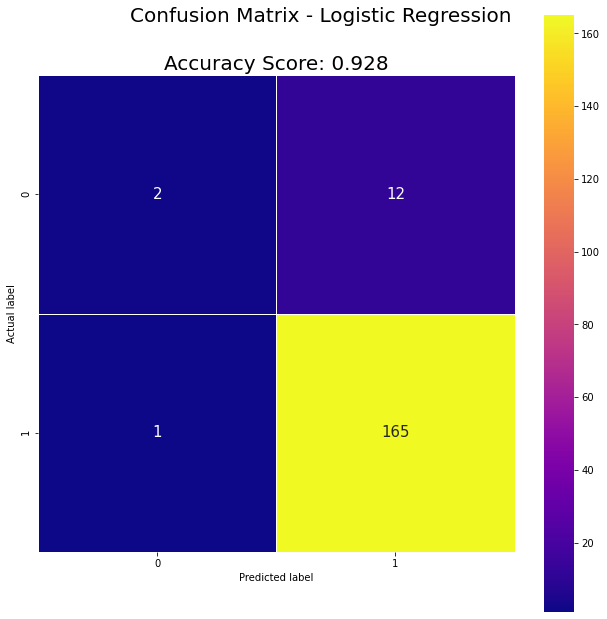

In [3]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = logreg.score(X_test, y_test)
print('Accuracy: %.3f' % (accuracy))

# Plot confusion matrix
plot_confusionmatrix(y_test, y_pred, accuracy, "Confusion Matrix - Logistic Regression","logreg")

## Neural Network

Using TensorFlow backend.
2021-12-17 18:27:32.381473: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-17 18:27:32.381938: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


180/180 [==============================] - 0s 1ms/step
Accuracy: 0.956


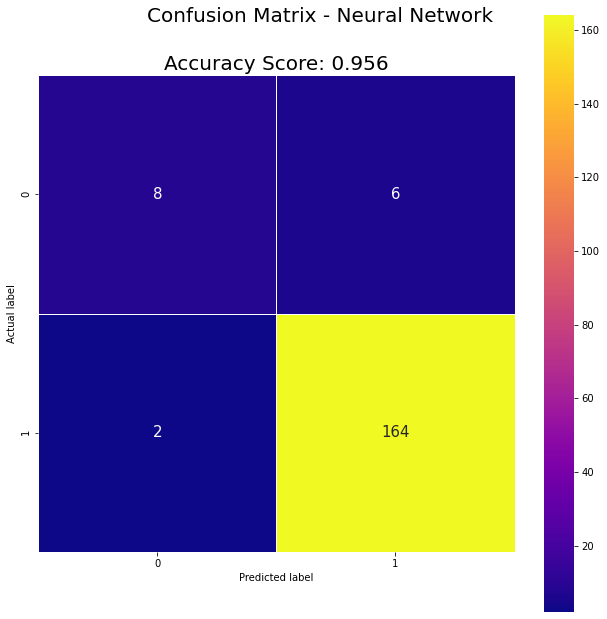

In [4]:
from keras.models import Sequential
from keras.layers import Dense

# create the NN structure + activation functions
nn = Sequential()
nn.add(Dense(300, activation='relu'))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
y_pred = nn.predict_classes(X_test).ravel()
loss, accuracy = nn.evaluate(X_test, y_test)
print('Accuracy: %.3f' % (accuracy))


plot_confusionmatrix(y_test, y_pred, accuracy, "Confusion Matrix - Neural Network", "nn")

## Support Vector Machine

Accuracy: 0.922


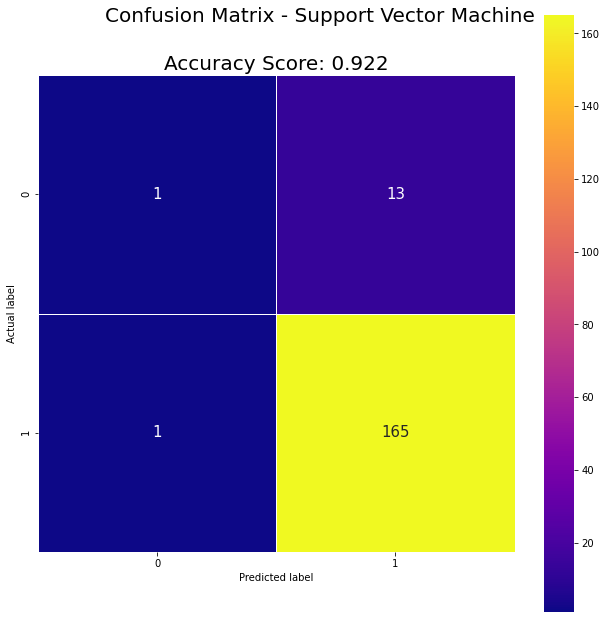

In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = svm.score(X_test, y_test)
print('Accuracy: %.3f' % (accuracy))

plot_confusionmatrix(y_test, y_pred, accuracy, "Confusion Matrix - Support Vector Machine","svm")

## ROC: ML comparison

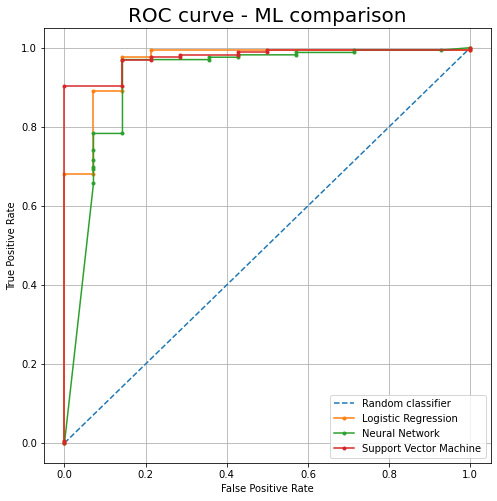

In [16]:
from sklearn.metrics import roc_curve

ns_probs = [0 for _ in range(len(y_test))] # probabilities for "Random Classifier"

# Logistic Regression
lr_probs = logreg.predict_proba(X_test) # predict probabilities of Logistic Regression
lr_probs = lr_probs[:, 1] # and keep just "success"

# Neural Network
nn_probs = nn.predict(X_test) # predict probabilities of NN
#nn_probs = nn_probs[:, 1] # and keep just "success

# Support Vector Machine
svm_probs = svm.decision_function(X_test) # predict probabilities of SVM
#svm_probs = svm_probs[:, 1] # and keep just "success"

# calculate and plot ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
fig = plt.figure(figsize = (8,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural Network')
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.title("ROC curve - ML comparison", size=20)
plt.savefig("figures/Results/ROC_comp.png")
plt.show()

## Neural Networks: different activation functions and optimizers

### 1) accuracy score and confusion matrix

Accuracy scores:
180/180 [==============================] - 0s 926us/step
relu  -  sgd : 0.961
180/180 [==============================] - 0s 948us/step
relu  -  adagrad : 0.961
180/180 [==============================] - 0s 937us/step
relu  -  rmsprop : 0.967
180/180 [==============================] - 0s 949us/step
relu  -  adam : 0.967
180/180 [==============================] - 0s 1ms/step
sigmoid  -  sgd : 0.922
180/180 [==============================] - 0s 920us/step
sigmoid  -  adagrad : 0.978
180/180 [==============================] - 0s 919us/step
sigmoid  -  rmsprop : 0.972
180/180 [==============================] - 0s 917us/step
sigmoid  -  adam : 0.961
180/180 [==============================] - 0s 908us/step
tanh  -  sgd : 0.967
180/180 [==============================] - 0s 942us/step
tanh  -  adagrad : 0.967
180/180 [==============================] - 0s 904us/step
tanh  -  rmsprop : 0.950
180/180 [==============================] - 0s 764us/step
tanh  -  adam : 0.950
180/180 [=

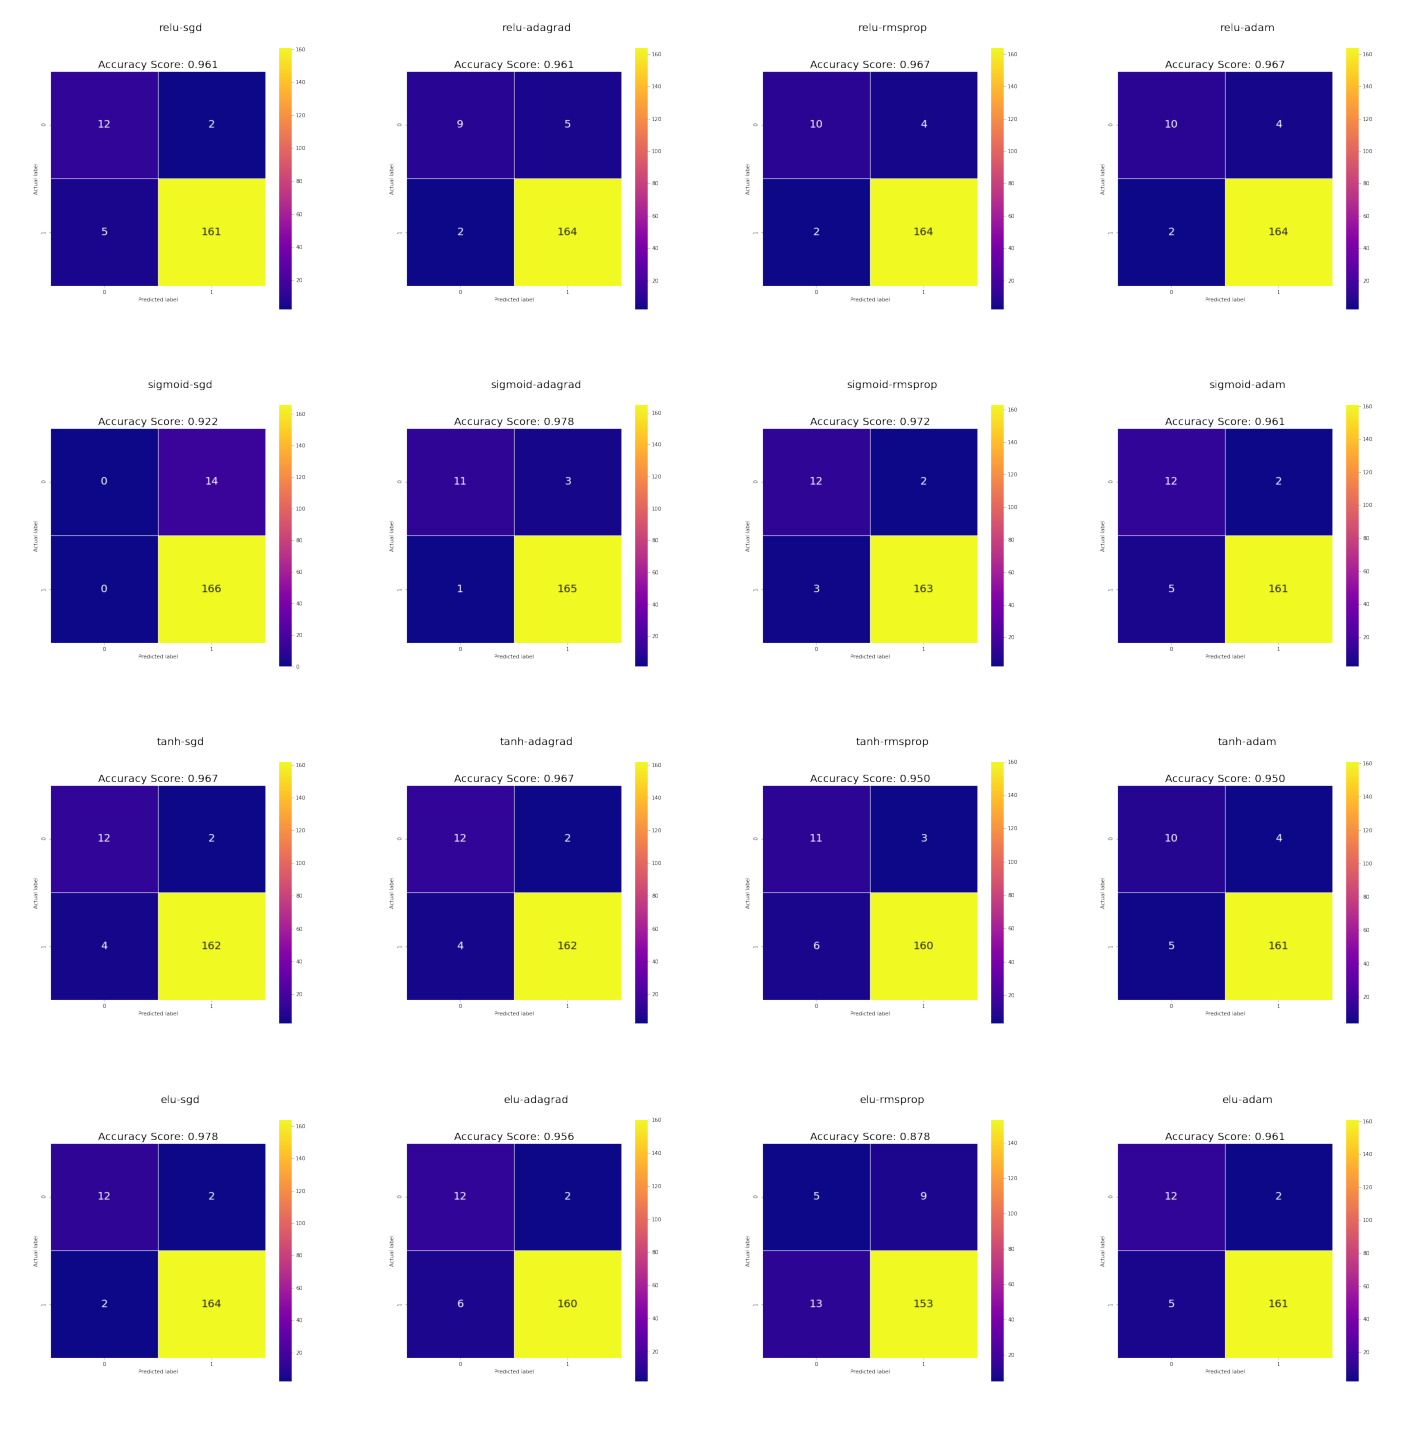

In [11]:
import matplotlib.image as mpimg

activations = ['relu', 'sigmoid', 'tanh', 'elu']
opts = ["sgd", "adagrad", "rmsprop", "adam"]
colors = ['#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#084594', '#2171b5', '#4292c6', '#6baed6', '#31446B', '#666870', '#958F78', '#CAB969', '#932567', '#DC5039', '#FBA40A', '#FCFEA4']

f, axs = plt.subplots(4, 4, figsize=(20, 20))

print("Accuracy scores:")

fprs = []
tprs = []
lbls = []
accs = []

c = 0
for i,a in enumerate(activations):
    for j,o in enumerate(opts):
        nn = Sequential()
        nn.add(Dense(300, activation=a))
        nn.add(Dense(100, activation=a))
        nn.add(Dense(30, activation=a))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=o, metrics=['accuracy'])
        nn.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
        y_pred = nn.predict_classes(X_test).ravel()
        loss, accuracy = nn.evaluate(X_test, y_test)
        accs.append(accuracy)
        print(a, ' - ', o, ': %.3f' % (accuracy))
        
        nn_fpr, nn_tpr, _ = roc_curve(y_test, nn.predict(X_test))
        #plt.plot(nn_fpr, nn_tpr, marker='.', label=a+' - '+o, color = colors[c])
        fprs.append(nn_fpr)
        tprs.append(nn_tpr)
        label = a+'-'+o
        lbls.append(label)
        c += 1
        plot_confusionmatrix(y_test, y_pred, accuracy,label, "nn_"+label, size=20, plot=False)
        axs[i,j].imshow(mpimg.imread('Figures/Results/confusionmatrix_nn_'+label+'.png'))
        
[ax.set_axis_off() for ax in axs.ravel()]

plt.tight_layout()
plt.savefig("Figures/Results/confusionmatrix_nn_overall.png")
plt.show() 

### 2) table of accuracies

In [12]:
df = pd.DataFrame(data = np.reshape(np.round(accs,3),(4,4)), columns = opts, index = activations)
display(df)

,sgd,adagrad,rmsprop,adam
relu,0.961,0.961,0.967,0.967
sigmoid,0.922,0.978,0.972,0.961
tanh,0.967,0.967,0.950,0.950
elu,0.978,0.956,0.878,0.961


### 3) ROC curve

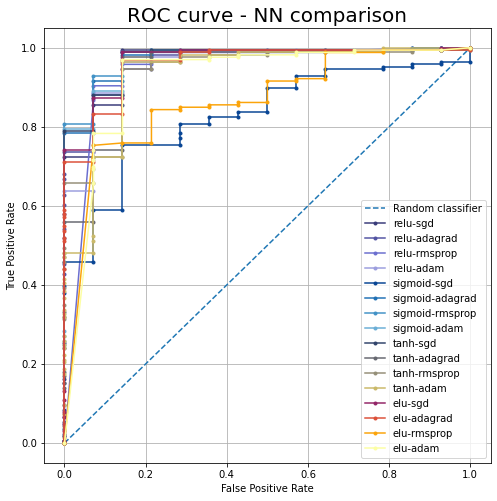

In [15]:
fig = plt.figure(figsize = (8,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random classifier')

for i in range(c):
    plt.plot(fprs[i], tprs[i], marker='.', label=lbls[i], color=colors[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.title("ROC curve - NN comparison", size=20)
plt.savefig("figures/Results/ROC_comp_NN.png")
plt.show()